<a href="https://colab.research.google.com/github/ChiUzonwa/FLIT-Apprenticeship/blob/main/Mkt_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
# loading the dataset
mkt_df= pd.read_csv('/content/drive/MyDrive/Flit Apprenticeship/Market Basket Analysis - Groceries_dataset.csv')

In [75]:
# getting the first 5 rows of the data
mkt_df.head(5)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [76]:
# getting the numbers of rows and columns respectively
mkt_df.shape

(38765, 3)

In [77]:
# getting 5 rows at random
mkt_df.sample(5)

,Member_number,Date,itemDescription
31954,2327,18-03-2015,margarine
11861,1889,16-11-2014,root vegetables
3012,3246,27-08-2015,canned beer
21375,1858,25-01-2015,butter milk
30959,4894,05-07-2014,brown bread


In [78]:
# changing the style of all the column names to snake-case
mkt_df.rename(columns={'Member_number': 'member_number',
                       'Date': 'date',
                       'itemDescription': 'item_description'}, inplace=True)

In [79]:
# confirming that the naming style worked
mkt_df.columns

Index(['member_number', 'date', 'item_description'], dtype='object')

In [80]:
# removing extra spaces in the item description column
mkt_df['item_description']=mkt_df['item_description'].str.strip()

In [81]:
# checking the data types for each column
mkt_df.dtypes

member_number        int64
date                object
item_description    object
dtype: object

In [82]:
# changing the date column data type to date-time
mkt_df['date']= pd.to_datetime(mkt_df['date'],format='%d-%m-%Y')

In [83]:
# converting the data type pf the member_number column to string since it will not be used in mathematical operations
mkt_df['member_number']= mkt_df['member_number'].values.astype('str')

In [84]:
# checking the general information of the columns
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   member_number     38765 non-null  object        
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [85]:
# creating a new column that shows a list of products purchased in one receipt:
mkt_df['unique_transactions']= mkt_df['member_number'] + "_" + mkt_df['date'].astype(str)

In [86]:
mkt_df.sample(7)

,member_number,date,item_description,unique_transactions
11397,4051,2014-12-18,bottled water,4051_2014-12-18
6179,4574,2015-11-27,bottled beer,4574_2015-11-27
34248,3784,2014-04-30,whipped/sour cream,3784_2014-04-30
34589,3480,2015-05-07,other vegetables,3480_2015-05-07
3862,1296,2015-11-06,pip fruit,1296_2015-11-06
18552,2286,2015-11-21,whole milk,2286_2015-11-21
7617,3164,2015-09-30,citrus fruit,3164_2015-09-30


In [102]:
# grouping items by their frequency of occurence in the data
unique_items_count= mkt_df.groupby("item_description").size().reset_index(name="count_of_items")
top_ten_items_count= unique_items_count.sort_values('count_of_items', ascending= False).head(10)
top_ten_items_count

,item_description,count_of_items
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
123,root vegetables,1071
156,tropical fruit,1032
12,bottled water,933
130,sausage,924
30,citrus fruit,812


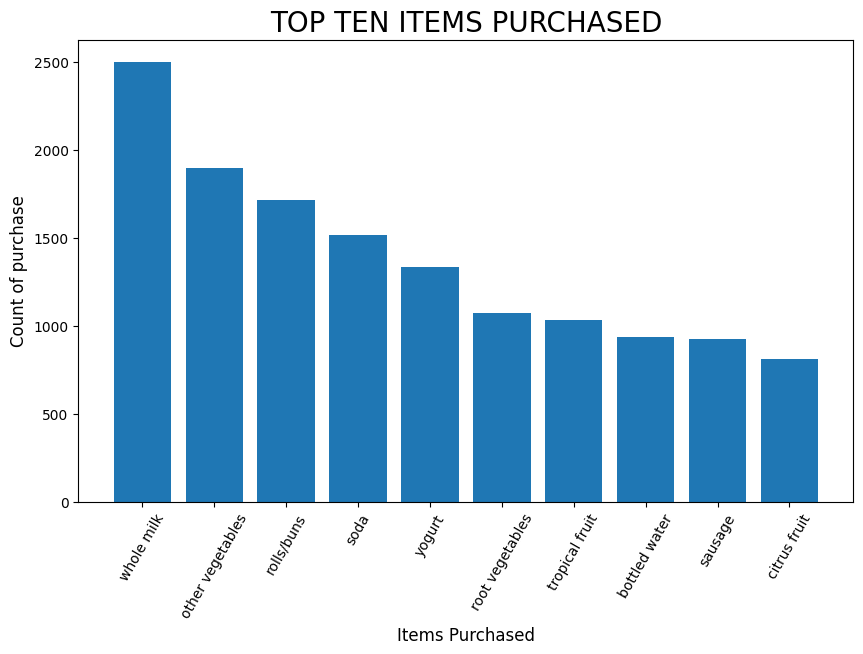

In [103]:
# plotting a bargraph of the top ten most purchased items
plt.figure(figsize=(10,6))
plt.bar(top_ten_items_count['item_description'],top_ten_items_count['count_of_items'])
plt.xlabel("Items Purchased", fontsize=12)
plt.xticks(rotation=60)
plt.ylabel("Count of purchase",fontsize=12)
plt.title("TOP TEN ITEMS PURCHASED", fontsize=20);

##Market Basket Analysis

In [89]:
# pivotting the unique_transactions table to show how many times each item has been purchased in one transaction
basket= pd.crosstab(mkt_df['unique_transactions'], mkt_df['item_description'])

In [90]:
# getting a sample of the basket table
basket.sample(5)

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
unique_transactions,,,,,,,,,,,,,,,,,,,,,
3462_2014-12-16,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4789_2015-09-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1883_2014-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1845_2015-08-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4089_2014-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#encoding all values in the above data frame to 0 and 1 (regardless of the frequency)
def encode(item_freq):
    result = 0
    if item_freq > 0:
        result = 1
    return result
apriori_df= basket.applymap(encode)

In [92]:
# getting the first 5 rows of the encoded dataframe
apriori_df.head(5)

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
unique_transactions,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# importing the MLXtend libraries required for the market basket analysis (MBA)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [94]:
# building the algorithm for the MBA
frequent_itemsets= apriori(apriori_df,min_support= 0.001,use_colnames= True)

In [95]:
rules= association_rules(frequent_itemsets, metric= 'lift', min_threshold= 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(tropical fruit),(UHT-milk),0.067767,0.021386,0.001537,0.022682,1.060617,8.785064e-05,1.001326,0.061307
1,(UHT-milk),(tropical fruit),0.021386,0.067767,0.001537,0.071875,1.060617,8.785064e-05,1.004426,0.058402
2,(brown bread),(beef),0.037626,0.033950,0.001537,0.040853,1.203301,2.597018e-04,1.007196,0.175559
3,(beef),(brown bread),0.033950,0.037626,0.001537,0.045276,1.203301,2.597018e-04,1.008012,0.174891
4,(citrus fruit),(beef),0.053131,0.033950,0.001804,0.033962,1.000349,6.297697e-07,1.000012,0.000369


the “antecedents” and “consequents” columns above show items that are frequently purchased together

In [96]:
# sorting the dataset by support, confidence, and lift to get the most frequent item combinations in the entire dataset
sorted_rules= rules.sort_values(['support', 'confidence', 'lift'], axis= 0, ascending= False).head(10)
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
199,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,8.775684e-05,1.001613,0.015702
198,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,8.775684e-05,1.000963,0.016341
200,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,5.648409e-04,1.010345,0.104587
201,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,5.648409e-04,1.007049,0.107508
128,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,5.355097e-04,1.016420,0.108146
129,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,5.355097e-04,1.004579,0.118536
88,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,4.855926e-05,1.001001,0.011121
89,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,4.855926e-05,1.000598,0.011520
139,(fruit/vegetable juice),(rolls/buns),0.034017,0.110005,0.003743,0.110020,1.000136,5.091755e-07,1.000017,0.000141
138,(rolls/buns),(fruit/vegetable juice),0.110005,0.034017,0.003743,0.034022,1.000136,5.091755e-07,1.000005,0.000153


In [97]:
#converting antecedents and consequents into strings
rules['antecedents']= rules['antecedents'].apply(lambda a: ',' .join(list(a)))
rules['consequents']= rules['consequents'].apply(lambda a: ',' .join(list(a)))

In [98]:
print(rules[['antecedents', 'consequents']])

           antecedents         consequents
0       tropical fruit            UHT-milk
1             UHT-milk      tropical fruit
2          brown bread                beef
3                 beef         brown bread
4         citrus fruit                beef
..                 ...                 ...
235     sausage,yogurt          whole milk
236  whole milk,yogurt             sausage
237            sausage   whole milk,yogurt
238         whole milk      sausage,yogurt
239             yogurt  sausage,whole milk

[240 rows x 2 columns]


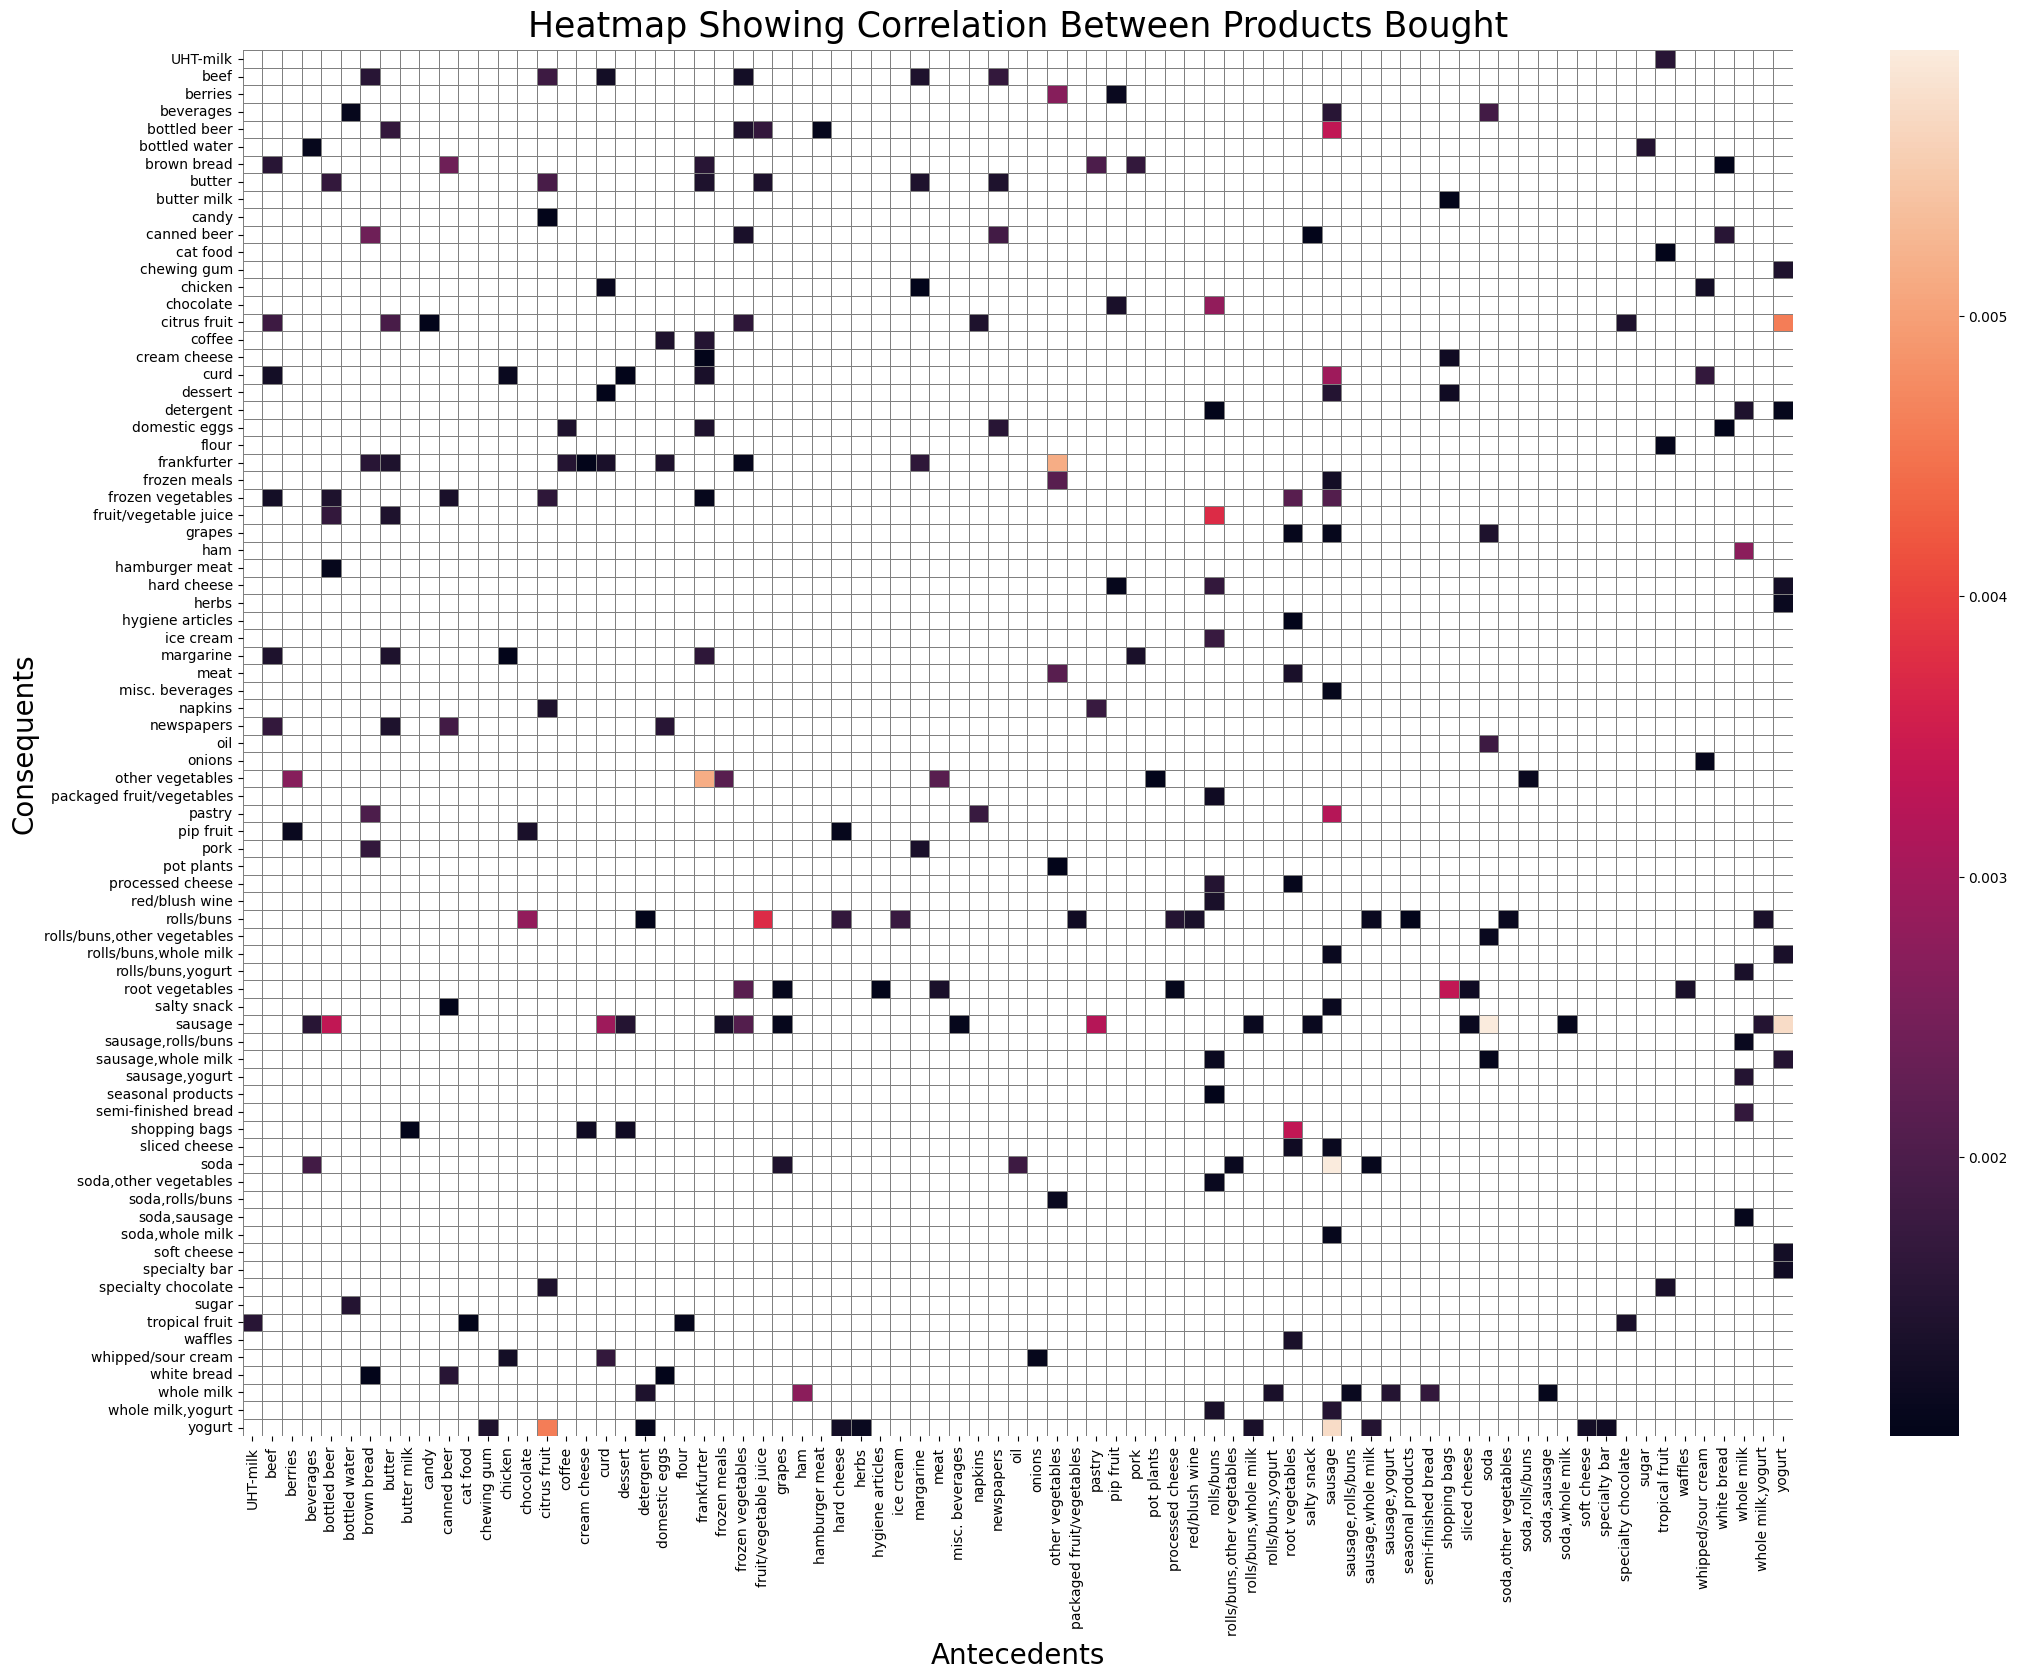

In [111]:
# plotting a heatmap to show the correlation between items
support_table= rules.pivot(index= 'consequents', columns= 'antecedents', values= 'support')
plt.subplots(figsize=(25,18))
sns.heatmap(support_table,linewidths= 0.5, linecolor='grey')
plt.xlabel('Antecedents', fontsize= 20)
plt.ylabel('Consequents', fontsize= 20)
plt.title('Heatmap Showing Correlation Between Products Bought', pad= 10, loc= 'center', fontsize= 25);

From the heatmap above, there are many products that are strongly correlated and have possibly been bought together. Examples of such are: hard cheese and yoghurt; whole milk, yogurt and rolls/buns; salty snack and canned beer; frozen vegetables and beef just to mention a few.